In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from shapely.geometry import Point, Polygon
import shapefile as shp
import geopandas as gpd
from pyproj import CRS

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,6)

In [8]:
open("/Users/olivianystrom/Desktop/Springboard/CA_Birds_of_Prey/Birds_of_Prey.csv")
df = pd.read_csv("/Users/olivianystrom/Desktop/Springboard/CA_Birds_of_Prey/Birds_of_Prey.csv")
print(df["COMMON NAME"].unique())
print(len(df["COMMON NAME"].unique()))
df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.head())
#looking at the list of birds we narrowed the list down to and their descriptive info

['Bald Eagle' "Cooper's Hawk" 'Red-tailed Hawk' 'American Kestrel'
 'White-tailed Kite' 'Sharp-shinned Hawk' 'Northern Harrier'
 'Peregrine Falcon' 'Great Horned Owl' 'Golden Eagle'
 'Red-shouldered Hawk' 'Western Screech-Owl' 'Barn Owl' 'Short-eared Owl'
 'Burrowing Owl' 'Northern Goshawk' 'Prairie Falcon' 'Ferruginous Hawk'
 'Northern Saw-whet Owl' 'Long-eared Owl' "Swainson's Hawk"
 'Broad-winged Hawk' 'Northern Pygmy-Owl' 'Merlin' 'Rough-legged Hawk'
 'Zone-tailed Hawk' 'Snowy Owl' 'Flammulated Owl' 'Barred Owl'
 "Harris's Hawk" 'Mississippi Kite' 'Common Black Hawk'
 'Swallow-tailed Kite' 'Gray Hawk' 'Elf Owl' 'Aplomado Falcon']
36
   Unnamed: 0.1            LAST EDITED DATE        COMMON NAME  \
0             0  2021-08-05 02:45:57.629774         Bald Eagle   
1             1  2021-04-01 02:35:26.368505      Cooper's Hawk   
2             2  2021-04-01 02:35:26.368505    Red-tailed Hawk   
3             3         2017-08-16 00:55:22   American Kestrel   
4             4         2

In [9]:
# Show total sightings over time
# Truncate date to year
# https://www.geeksforgeeks.org/creating-a-time-series-plot-with-seaborn-and-pandas/
from datetime import datetime

df['OBSERVATION DATE'] = pd.to_datetime(df['OBSERVATION DATE']).astype(str) + ' 0:00'

df_locs = df[['OBSERVATION DATE', 'COMMON NAME', 'SCIENTIFIC NAME', 'LATITUDE', 'LONGITUDE', 'COUNTY']]
# df.groupby(by=[df.index.month, df.index.year])
print(df_locs.head())



  OBSERVATION DATE        COMMON NAME           SCIENTIFIC NAME   LATITUDE  \
0  1999-01-18 0:00         Bald Eagle  Haliaeetus leucocephalus  41.754666   
1  1996-10-13 0:00      Cooper's Hawk        Accipiter cooperii  33.531253   
2  1997-08-22 0:00    Red-tailed Hawk         Buteo jamaicensis  33.462797   
3  1995-09-11 0:00   American Kestrel          Falco sparverius  35.615712   
4  1994-10-15 0:00  White-tailed Kite           Elanus leucurus  36.826080   

    LONGITUDE     COUNTY  
0 -124.202714  Del Norte  
1 -117.075205  Riverside  
2 -115.980082  Riverside  
3 -118.251686       Kern  
4 -121.632273   Monterey  


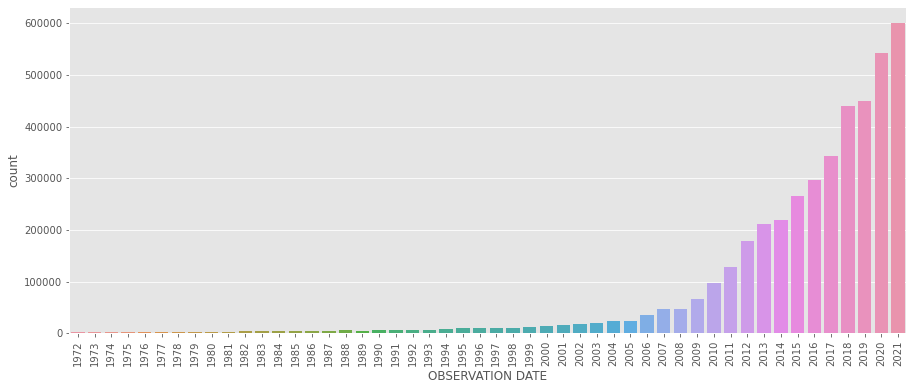

In [20]:

#Plot to show sightings over time. Sightings increase dramatically over time and do not appear to have hit a 
#plateau yet, which shows the popularity of using ebird is rising, but does not tell us much about the actual birds.
# sns.countplot(data = df, x=pd.DatetimeIndex(df['OBSERVATION DATE']).year)
dates=pd.DatetimeIndex(df['OBSERVATION DATE']).year

sns.countplot(data = df, x=(dates[dates>1971]))
plt.xticks(rotation = 90)
plt.savefig('sightings_over_time.png')


In [7]:
#Starting the Lat/Long plotting

#loading a shape file of California to plot bird location data on
CA_counties_data = gpd.read_file("/Users/olivianystrom/Desktop/Springboard/CA_Birds_of_Prey/CA_Counties/CA_Counties_TIGER2016.shp")
CA_counties = pd.DataFrame()
CA_counties = CA_counties.append(CA_counties_data)
CA_counties

#merging location dataframe with shapefile dataframe info
kepler_merged_df = pd.merge(df_locs,CA_counties, how = 'left', left_on='COUNTY', right_on = 'NAME')
print(kepler_merged_df.columns)
#cut down columns so kepler can read the dataframe
kepler_merged_small = kepler_merged_df[['OBSERVATION DATE', 'COMMON NAME', 'SCIENTIFIC NAME', 'LATITUDE', 'LONGITUDE', 'COUNTY']]
kepler_merged_small

Index(['OBSERVATION DATE', 'COMMON NAME', 'SCIENTIFIC NAME', 'LATITUDE',
       'LONGITUDE', 'COUNTY', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID',
       'NAME', 'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP',
       'METDIVFP', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry'],
      dtype='object')


,OBSERVATION DATE,COMMON NAME,SCIENTIFIC NAME,LATITUDE,LONGITUDE,COUNTY
0,1999-01-18 0:00,Bald Eagle,Haliaeetus leucocephalus,41.754666,-124.202714,Del Norte
1,1996-10-13 0:00,Cooper's Hawk,Accipiter cooperii,33.531253,-117.075205,Riverside
2,1997-08-22 0:00,Red-tailed Hawk,Buteo jamaicensis,33.462797,-115.980082,Riverside
3,1995-09-11 0:00,American Kestrel,Falco sparverius,35.615712,-118.251686,Kern
4,1994-10-15 0:00,White-tailed Kite,Elanus leucurus,36.826080,-121.632273,Monterey
...,...,...,...,...,...,...
4240971,1994-02-02 0:00,Peregrine Falcon,Falco peregrinus,37.641932,-122.151701,Alameda
4240972,1984-03-03 0:00,Red-shouldered Hawk,Buteo lineatus,34.436575,-118.609858,Los Angeles
4240973,1999-12-10 0:00,Golden Eagle,Aquila chrysaetos,39.002042,-123.084710,Mendocino
4240974,1997-12-30 0:00,Western Screech-Owl,Megascops kennicottii,37.465594,-121.520119,Santa Clara


In [9]:
from keplergl import KeplerGl
kepler_map = KeplerGl(height = 550, data={'Bird Data': kepler_merged_small})
kepler_map
#Using the Common Name filter to filter by bird species, it's easy to see which are the vagrant birds, vs the species
#actually live in california (whether native or naturalized)
#Range distributions also vary widely, which should be helpful in the ML stage. Northern Goshawk is a good example for
#a bird with a fairly defined region. As are barred owls. American Kestrels (eg) can be seen basically everywhere in CA
#so distinguishing those from any other raptor will depend more on size and color than location. 

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Bird Data':         OBSERVATION DATE          COMMON NAME           SCIENTIFIC NAME  \
0      …